
# 神经网实现      手写识别体的多分类


## 数据集的下载

使用以下git命令克隆：


```
git clone https://github.com/mnielsen/neural-networks-and-deep-learning.git
```

该数据集分为：

- 60000 幅训练图像
- 10000 幅测试图像

我们把 60000幅训练图像再划分为：
- 50000 幅训练集
- 10000 幅验证集

使用验证集有助于我们设置神经网络的某些**超参数**，例如学习率（lr）等。


### 定义神经网络代码的核心片段

假如定义最简单的3层神经网络，```sizes = [2, 3, 1]```,则：

偏置的维度：(3, 1) <br/>
权重的维度：(3, 2), (1, 3)

以下定义的 类 Network 中的偏置bias 和权重weights 都是随机变化的，值为0~1之间的正态分布数。

假如我们实例化对象：
```python
    net = Network()
```

**注：**
-  np.random.randn() 生成的是均值为0，标准差为1的高斯分布(正态分布)。
-  第一层神经元是一个输入层，不对其设置任何偏置，因为偏置在后面的层中用于计算输出。
-  偏置和矩阵以 NumPy 矩阵列表的形式存储。例如：net.weights[1] : 第2层和第3层神经元之间的权重。

我们使用 $ \omega $ 表示矩阵， $ \omega_{jk} $ 表示第2层的k个神经元，第3层的j个神经元的权重。

这样写有点绕，目的是为了计算 权重 和 输入层变量进行 点乘，即：

$$
    a^{\prime} = \sigma(\omega \cdot a + b)
$$

以上例子， $\omega$ 是 第2、3层的权重激活向量， a 是第二次神经元的**激活向量**(可以理解为权重\*输入+偏置之后经过激活函数)，

$ \sigma() $ 函数是 **激活函数**sigmoid函数，定义如下：

$$
    sigmoid = \frac{1}{1+e^{-x}} 
$$

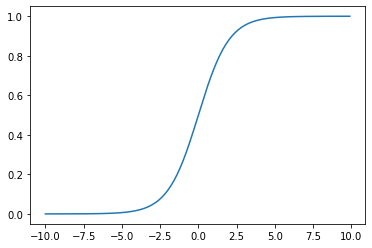

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))  

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()


In [12]:
import numpy as np
import pandas as pd

class Network(object):
    '''
        sizes ： 各层神经元的个数
    '''
    def __init__(self, sizes:list):
        
        self.num_layers = len(sizes)                                 # 神经元的层数
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]      # 偏置 b
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
    pass

Network([2, 3, 1])

In [161]:
sizes = [2, 3, 1]
biases = [np.random.randn(y, 1) for y in sizes[1:]]
biases   # 偏置

[array([[0.18432784],
        [0.82520967],
        [0.60771146]]),
 array([[0.85903724]])]

In [162]:
weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])] # 权重
weights

[array([[ 1.22696517, -0.1890644 ],
        [ 0.6620969 , -1.05068215],
        [-0.07214618, -0.00129603]]),
 array([[-0.48003099, -0.11764437,  1.63769586]])]

In [163]:
[np.zeros(b.shape) for b in biases]

[array([[0.],
        [0.],
        [0.]]),
 array([[0.]])]

### 前向传播

该方法和我上一个博文中mnist的多分类预测中，写的 query() 是相同的功能实现。



In [49]:
def feedforward(self, a):
    """若 a 为输入，则返回输出
        注：a 为 上一个节点的激活输出，如果为第一个节点，则是输入层的神经元个数，维度为 (n_variable, 1) 的NumPy ndarray数组，而不是
        (n_variable,)的向量，这样写的目的是便于计算机计算，也便于修改代码实现同时前馈多个输入。
        并且，CPU 一次只传入一个样本进行训练，右边的 1 代表一个样本。
        
    """
    for b, w in zip(self.biases, self.weights):
        a = sigmoid(np.dot(w, a) + self.biases)  # y = w*x+b
    return a

### 梯度下降算法


#### 随机梯度下降算法

这里我们使用**随机梯度下降算法**

In [ ]:
def SGD(self， )：

In [159]:
import random

training_data = np.arange(6).reshape(6,)
training_data

array([0, 1, 2, 3, 4, 5])

In [160]:
random.shuffle(training_data)
training_data

array([2, 0, 5, 3, 1, 4])

In [158]:
seq = [1, 2, 3, 4, 5]
random.shuffle(seq)
seq

[2, 1, 5, 4, 3]